<a href="https://colab.research.google.com/github/Saulrega/regresion_lineal/blob/main/Predecir_los_gastos_m%C3%A9dicos_de_pacientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Descarga e instalación de librerías

In [1]:
!pip install regressors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for regressors: filename=regressors-0.0.3-py2.py3-none-any.whl size=12401 sha256=75b7e28ce005b2ed6c08978f830efb15a3f3c3c4c7e73a7cd70756c2f7082456
  Stored in directory: /root/.cache/pip/wheels/5e/84/7d/c7f674a24c508709cdd3aa6cf0f129899f21061b2821ceed32
Successfully built regressors


In [2]:
import pandas as pd
import seaborn as sns
sns.set(style='whitegrid', context='notebook')

## Descargando los datos

In [5]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Analizando los datos

In [6]:
print(df.shape)

(1338, 7)


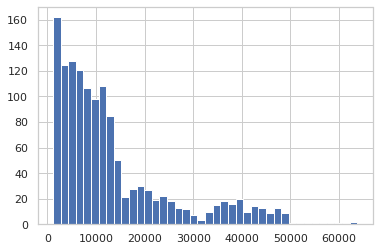

In [7]:
df.charges.hist(bins=40)

In [8]:
df[df.charges>50000]
df = df[df.charges<50000]

## Viendo correlaciones

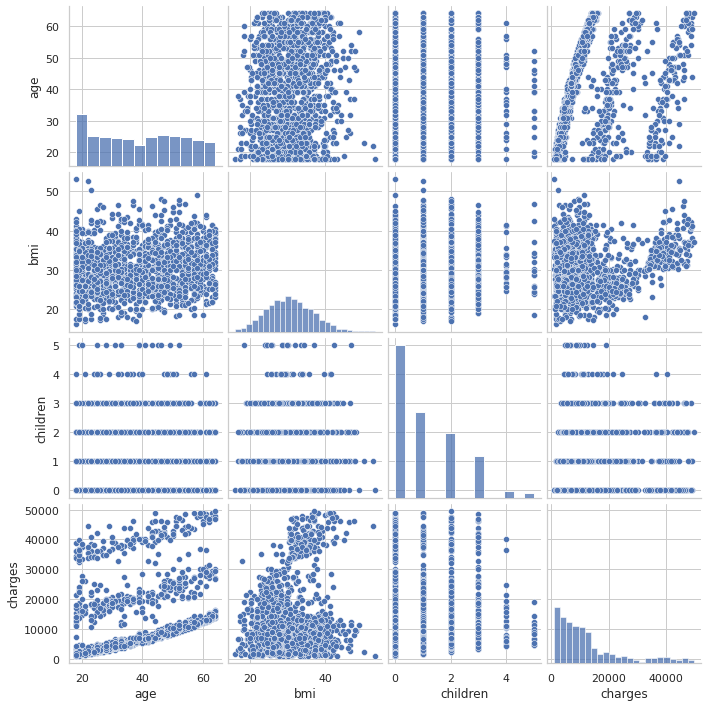

In [9]:
import matplotlib.pyplot as plt
sns.pairplot(df, height=2.5)
plt.show()

In [10]:
import numpy as np

cols_numericas = [colname for colname in df.columns if df[colname].dtype in ['int64', 'float64']]
cols_categoricas = [colname for colname in df.columns if df[colname].dtype in ['object']]

cm = np.corrcoef(df[cols_numericas].values.T)

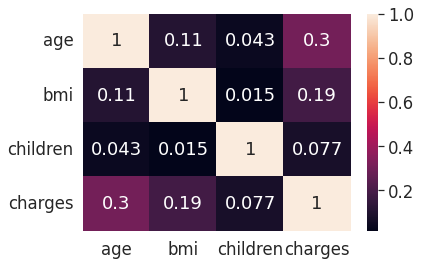

In [11]:
sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, yticklabels=cols_numericas, xticklabels=cols_numericas)

## Utilizando las demás variables

In [12]:
df = pd.get_dummies(df, columns=['sex','smoker','region'], drop_first=True)
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


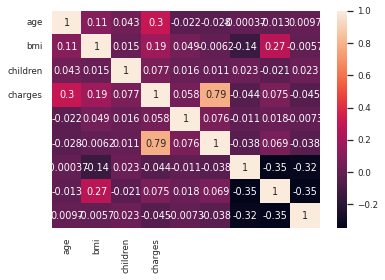

In [13]:
cm2 = np.corrcoef(df.values.T)
sns.set(font_scale=.8)
sns.heatmap(cm2, annot=True, yticklabels=cols_numericas, xticklabels=cols_numericas)

## Creando modelos 

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [15]:
X_cols = list(set(df.columns)-set(['charges']))
y_col = ['charges']

x = df[X_cols].values
y = df[y_col].values

X_train, X_test, y_train, y_test = train_test_split(x, y)
sc_x = StandardScaler().fit(x)
sc_y = StandardScaler().fit(y)


X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)

y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [16]:
y_pred.shape

(333, 1)

## Funciones de métricas

In [17]:
import sklearn.metrics as metrics

In [18]:
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print('r2: ', r2.round(4))
print('mse: ', mse.round(4))


r2:  0.7717
mse:  0.2679


In [19]:
from regressors import stats    

model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [20]:
y_test = y_test.reshape(-1)

print('==========Summary=========')
stats.summary(model, X_test, y_test, X_cols)

==========Summary=========
Residuals:
    Min      1Q  Median     3Q    Max
-2.0117 -0.1484  0.0925 0.2426 0.8838


Coefficients:
                  Estimate  Std. Error  t value   p value
_intercept       -0.006222    0.028584  -0.2177  0.827824
region_southwest -0.049812    0.032021  -1.5556  0.120748
children          0.055941    0.027529   2.0320  0.042945
bmi               0.160224    0.030207   5.3041  0.000000
age               0.324209    0.029355  11.0445  0.000000
region_southeast -0.042363    0.034375  -1.2324  0.218685
sex_male         -0.001482    0.029022  -0.0511  0.959293
region_northwest -0.012706    0.033775  -0.3762  0.707006
smoker_yes        0.779038    0.027195  28.6460  0.000000
---
R-squared:  0.77170,    Adjusted R-squared:  0.76606
F-statistic: 136.90 on 8 features


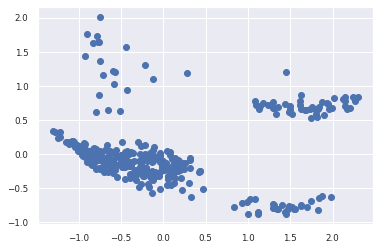

In [21]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.show()

## Segundo modelo

In [22]:
df_second = df.copy()
df_second['age2'] = df_second.age**2
df_second['sobrepeso'] = (df_second.bmi >=30).astype(int)
df_second['sobrepeso*fumador'] = df_second.sobrepeso * df_second.smoker_yes

Analizando el segundo modelo

In [23]:
X_cols = list(set(df_second.columns)-set(['charges']))
y_col = ['charges']

x = df_second[X_cols].values
y = df_second[y_col].values

X_train, X_test, y_train, y_test = train_test_split(x, y)
sc_x = StandardScaler().fit(x)
sc_y = StandardScaler().fit(y)


X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)

y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [24]:
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print('r2: ', r2.round(4))
print('mse: ', mse.round(4))

r2:  0.8473
mse:  0.1328


In [25]:
model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

y_test = y_test.reshape(-1)

print('==========Summary=========')
stats.summary(model, X_test, y_test, X_cols)

==========Summary=========
Residuals:
    Min    1Q  Median     3Q    Max
-1.9029 0.062  0.1129 0.1488 0.3512


Coefficients:
                   Estimate  Std. Error  t value   p value
_intercept         0.001373    0.020298   0.0676  0.946130
region_southwest  -0.054069    0.022894  -2.3617  0.018767
children           0.077016    0.019507   3.9480  0.000096
bmi                0.055067    0.031322   1.7581  0.079651
age               -0.048460    0.103894  -0.4664  0.641207
region_southeast  -0.027895    0.024022  -1.1612  0.246384
age2               0.373466    0.104233   3.5830  0.000391
sobrepeso         -0.036979    0.031010  -1.1925  0.233918
sex_male          -0.025110    0.020297  -1.2371  0.216906
sobrepeso*fumador  0.505549    0.029273  17.2701  0.000000
region_northwest  -0.022792    0.024994  -0.9119  0.362492
smoker_yes         0.444491    0.025220  17.6245  0.000000
---
R-squared:  0.84733,    Adjusted R-squared:  0.84209
F-statistic: 161.96 on 11 features


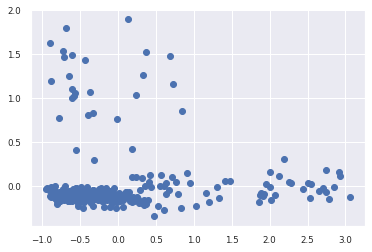

In [26]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.show()

In [27]:
X_cols = [ 'smoker_yes', 'age2', 'sobrepeso*fumador', 'children']
y_col = ['charges']

x = df_second[X_cols].values
y = df_second[y_col].values

X_train, X_test, y_train, y_test = train_test_split(x, y)
sc_x = StandardScaler().fit(x)
sc_y = StandardScaler().fit(y)


X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)

y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print('r2: ', r2.round(4))
print('mse: ', mse.round(4))


model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

y_test = y_test.reshape(-1)

print('==========Summary=========')
stats.summary(model, X_test, y_test, X_cols)

r2:  0.9126
mse:  0.0951
==========Summary=========
Residuals:
    Min     1Q  Median     3Q    Max
-1.7468 0.0865  0.1256 0.1579 0.3409


Coefficients:
                   Estimate  Std. Error  t value   p value
_intercept         0.010391    0.016945   0.6132  0.540166
smoker_yes         0.449175    0.021262  21.1257  0.000000
age2               0.325463    0.017670  18.4194  0.000000
sobrepeso*fumador  0.493643    0.020480  24.1034  0.000000
children           0.069884    0.018454   3.7869  0.000181
---
R-squared:  0.91257,    Adjusted R-squared:  0.91150
F-statistic: 855.86 on 4 features


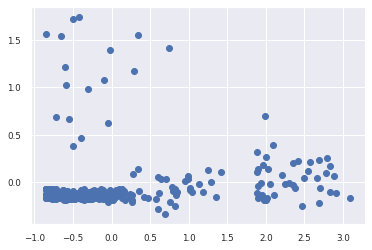

In [28]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.show()